# EDA for **Anxiety** Before and After Pandemic

## Import packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Import data set

In [7]:
anxiety_pre = pd.read_csv('../../data/anxiety_pre_features_tfidf_256.csv')
anxiety_post = pd.read_csv('../../data/anxiety_post_features_tfidf_256.csv')

## Filter feature of interest: substance_use_total

In [14]:
anxiety_pre = anxiety_pre.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]
anxiety_post = anxiety_post.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]

## Pre-Pandemic data set

In [15]:
anxiety_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,anxiety,ljf3030,2019/07/06,"I can always feel my heartbeat 18M, physically...",2
1,anxiety,1millionkarmagoal,2019/07/06,My dad is hospitalized and had to be put in a ...,0
2,anxiety,ItsIncremento,2019/07/06,Feels like anxiety is turning my brain to stew...,0
3,anxiety,Emet_Throwaway,2019/07/06,What do you do when anxiety kicks in around ot...,1
4,anxiety,throwaway239423489,2019/07/06,Finding a job is a nightmare I want to rant ab...,2


In [17]:
anxiety_pre.tail(5)

,subreddit,author,date,post,substance_use_total
19971,anxiety,heretothrowawaynow,2019/08/11,Ugh I didn't check my class GC for 3 days beca...,0
19972,anxiety,throwawayreddit67778,2019/08/11,Anybody else get bad anxiety the day after eat...,1
19973,anxiety,throwaway52689533564,2019/08/11,My brain is cruel Looking for some advice. I'...,3
19974,anxiety,krisappear,2019/08/11,I change how I live to avoid potentially upset...,0
19975,anxiety,blackhawk08,2019/08/11,Anhedonia is terrifying Anyone else battle thi...,0


In [20]:
print(f'Total number of records in the pre-pandemic dataset: {len(anxiety_pre)}')

Total number of records in the pre-pandemic dataset: 19976


## Post-Pandemic data set

In [28]:
anxiety_post.head(5)

,subreddit,author,date,post,substance_use_total
0,anxiety,Sweet0ptimisms,2020/01/01,Anybody else feel like they're sick more often...,0
1,anxiety,calmthemind7,2020/01/01,Has anyone else had bad anxiety for a week str...,0
2,anxiety,Munous,2020/01/01,"Honestly, I don’t know. I feel like I need to ...",0
3,anxiety,montanugh,2020/01/01,I’m terrified and I don’t know why I go back t...,0
4,anxiety,skaterkid24,2020/01/01,New Years Anxiety? So my anxiety came roaring ...,1


In [29]:
anxiety_post.tail(5)

,subreddit,author,date,post,substance_use_total
15891,anxiety,awesomekirby098,2020/04/20,My worst fear came to life today. One of my fr...,0
15892,anxiety,unicorns-are-real-x,2020/04/20,***GROSS ANXIETY STORY*** help... This is real...,0
15893,anxiety,Puzzle8888,2020/04/20,Really need advice and help please The last mo...,1
15894,anxiety,SealevelBluegrass,2020/04/20,Anxiety to live up in the tech industry I’m a ...,0
15895,anxiety,ellis-magee,2020/04/20,My coping toolbox I’m writing this partly for ...,2


In [31]:
print(f'Total number of records in the post-pandemic dataset: {len(anxiety_post)}')

Total number of records in the post-pandemic dataset: 15896


## High Level Analysis of Pre and Post Pandemic datasets

First we'll combine the two dataset into one--which will make it easier to compare:

In [38]:
anxiety_pre['period'] = 'pre'
anxiety_post['period'] = 'post'

anxiety_df = pd.concat([anxiety_pre, anxiety_post])
anxiety_df

,subreddit,author,date,post,substance_use_total,period
0,anxiety,ljf3030,2019/07/06,"I can always feel my heartbeat 18M, physically...",2,pre
1,anxiety,1millionkarmagoal,2019/07/06,My dad is hospitalized and had to be put in a ...,0,pre
2,anxiety,ItsIncremento,2019/07/06,Feels like anxiety is turning my brain to stew...,0,pre
3,anxiety,Emet_Throwaway,2019/07/06,What do you do when anxiety kicks in around ot...,1,pre
4,anxiety,throwaway239423489,2019/07/06,Finding a job is a nightmare I want to rant ab...,2,pre
...,...,...,...,...,...,...
15891,anxiety,awesomekirby098,2020/04/20,My worst fear came to life today. One of my fr...,0,post
15892,anxiety,unicorns-are-real-x,2020/04/20,***GROSS ANXIETY STORY*** help... This is real...,0,post
15893,anxiety,Puzzle8888,2020/04/20,Really need advice and help please The last mo...,1,post
15894,anxiety,SealevelBluegrass,2020/04/20,Anxiety to live up in the tech industry I’m a ...,0,post


In [52]:
pd.concat([anxiety_pre.describe(), anxiety_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,19976.000000,15896.000000
mean,0.491740,0.488362
std,1.090329,1.036541
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,63.000000,16.000000


### Visualization

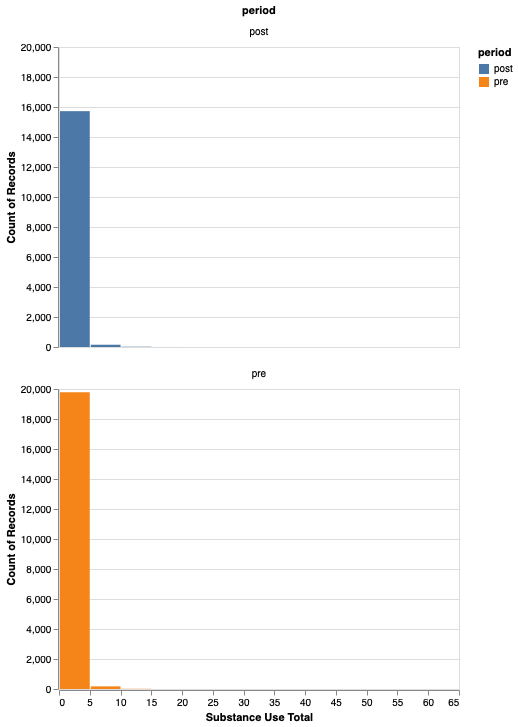

In [50]:
alt.Chart(anxiety_df).mark_bar().encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=20), title = 'Substance Use Total'),
    y='count()',
    color='period'
).facet('period', columns=1)

In [46]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(anxiety_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(anxiety_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 19976
Number of unique authors (posters) in 'post' dataset: 15896


1. Every records in the dataset is associated with an unique author
2. The number of unique authors before the pandemic is a little more than after pandemic
3. The mean of the substance use total before pandemic is slightly higher than after pandemic